In [1]:
# Importing libraries for handle data, perform analysis, create visualizations, and build and train machine learning models. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Read the data from CSV file
eeg_df = pd.read_csv('EEG_data.csv')

In [4]:
eeg_df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,1.0,0.0


In [5]:
info_df = pd.read_csv('demographic_info.csv')

In [6]:
info_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [7]:
# Merging data frames
# info DataFrame to match the column name in the data DataFrame ('SubjectID'). 
# Then, it merges the two DataFrames based on the common 'SubjectID' column.
# Creating a new DataFrame with combined data from both sources.

info_df.rename(columns={'subject ID': 'SubjectID'}, inplace=True)
data = info_df.merge(eeg_df, on='SubjectID')

In [8]:
data

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,1.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [10]:
# Data sanitizing
# In this data drop function, remove unnecessary or irrelevant features before training the machine learning model.

data = data.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1)

In [11]:
data.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [12]:
# Here, this rename fuction rename columns in the data DataFrame will be renamed as specified in the dictionary.

data.rename(columns={' age': 'Age', ' ethnicity': 'Ethnicity', ' gender': 'Gender', 'user-definedlabeln': 'Label'}, inplace=True)

In [13]:
data

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,0.0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,0.0
12808,24,Han Chinese,F,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,0.0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,0.0


In [14]:
# In the 'Label' column of the DataFrame data, which were originally of some data type,
# And converts them to the integer data type (int).

data['Label'] = data['Label'].astype(np.int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13344\3494886646.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Label'] = data['Label'].astype(np.int)


In [15]:
data

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0
1,25,Han Chinese,M,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0
2,25,Han Chinese,M,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0
3,25,Han Chinese,M,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0
4,25,Han Chinese,M,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,0
12808,24,Han Chinese,F,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,0


In [16]:
# In this code snippet calculates and prints the total number of missing values (NaN values) in the DataFrame data.

print("Missing values:", data.isna().sum().sum())

Missing values: 0


In [17]:
# Encoding features
# The unique method is used to retrieve the unique values present in the specified column.

data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
# Here it takes the values in the 'Gender' column of the DataFrame data,
# which are originally strings ('M' or other values), and replaces them with integers (1 for 'M' and 0 for other values).

data['Gender'] = data['Gender'].apply(lambda x: 1  if x == 'M' else 0)

In [19]:
# The unique method is used to retrieve the unique values present in the specified column.

data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [20]:
# Here, it takes a categorical column ('Ethnicity') in the DataFrame data,
# converts it into binary dummy variables using pd.get_dummies,
# concatenates these dummy variables with the original DataFrame using pd.concat,
# and then drops the original categorical column to create a modified DataFrame,
# with the categorical data represented as binary features.

ethnicity_dummies = pd.get_dummies(data['Ethnicity'])
data = pd.concat([data, ethnicity_dummies], axis=1)
data = data.drop('Ethnicity', axis=1)

In [21]:
data

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,0,0,0,1
12807,24,0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,0,0,0,1
12808,24,0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,0,0,0,1
12809,24,0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,0,0,0,1


In [22]:
# Here,it selects columns from the DataFrame data that have the data type 'object', which typically represents non-numeric data.
# It counts the number of such columns using the len function.
# then prints a message to the console indicating the count of non-numeric columns in the DataFrame.

print("Non-numeric columns:", len(data.select_dtypes('object').columns))

Non-numeric columns: 0


In [23]:
# '.dtypes', it returns a Series that represents the data types of each column in the DataFrame.

data.dtypes

Age              int64
Gender           int64
Attention      float64
Mediation      float64
Raw            float64
Delta          float64
Theta          float64
Alpha1         float64
Alpha2         float64
Beta1          float64
Beta2          float64
Gamma1         float64
Gamma2         float64
Label            int32
Bengali          uint8
English          uint8
Han Chinese      uint8
dtype: object

In [24]:
# These lines of the code are used to extract and count the number of features in the dataset, 
# excluding the target variable 'Label'. 
# This can be helpful for various data analysis, 
# and machine learning tasks where need to work with the input features separately from the target variable.

features = data.drop('Label', axis=1).copy()
num_features = len(features.columns)

print("Features:", num_features)

Features: 16


In [25]:
# In this code snippet is used to organize and categorize the column names in the dataset into two lists: 
# categorical_features and continuous_features. 

categorical_features = ['Age', 'Gender', 'Bengali', 'English', 'Han Chinese']
continuous_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

print("Categorical Features:", len(categorical_features))
print("Continuous Features:", len(continuous_features))

Categorical Features: 5
Continuous Features: 11


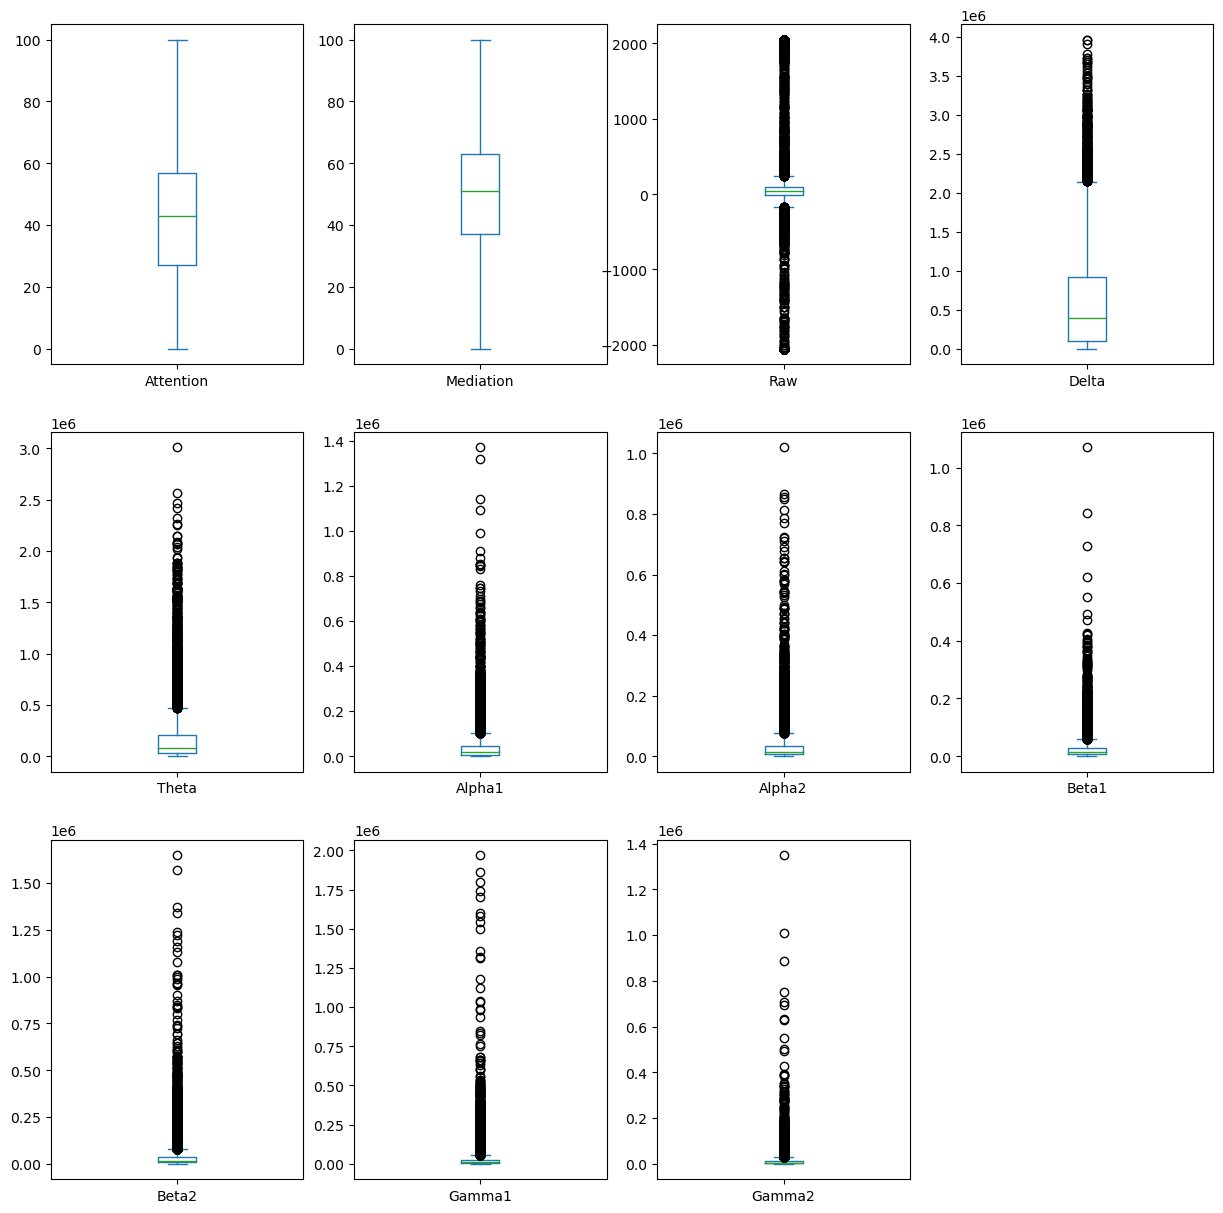

In [26]:
# In this code snippet takes specific columns of continuous data from the features DataFrame,
# and creates a grid of box plots for visualization.
# Each box plot represents the distribution of a continuous variable.

features[continuous_features].plot(kind='box', figsize=(15, 15), subplots=True, layout=(3, 4))
plt.show()